## Семинар 2

# Тема: Построение 3D-графиков. Метод градиентного спуска

Импортируем необходимые библиотеки:

In [3]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

### Пример построения 3D-графика функции $z = x^2 + y^2$ на квадрате $[-10;10]\times[-10;10]$.

In [4]:
def z(x, y):
    return x**2 + y**2

In [43]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-10,10,N)
x_grid, y_grid = np.meshgrid(x, y)

In [ ]:
x

In [6]:
z_grid = z(x_grid, y_grid)

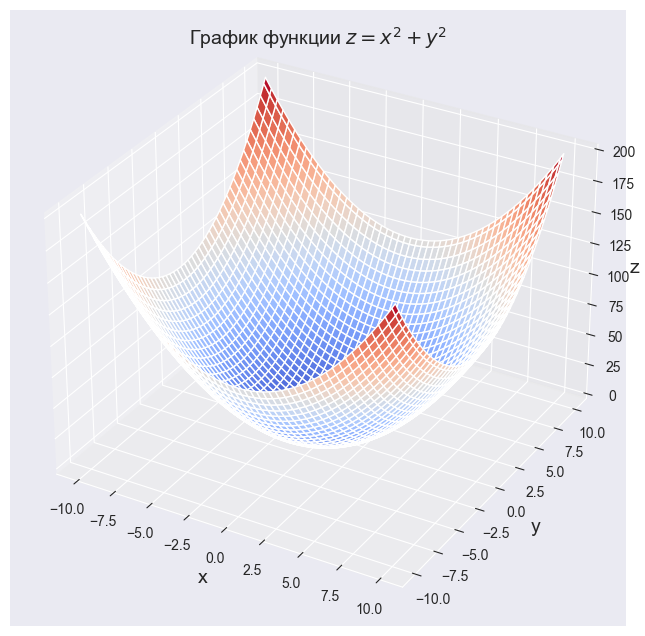

In [8]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### Метод градиентного спуска
Функция $y = f(x_1, x_2,\dots , x_n)$ - непрерывно-дифференцируемая и выпукла.

Требуется найти некоторую точку $(x^{*}_1, x^{*}_2,\dots , x^{*}_n)$ локального минимума этой функции.

*Для применения метода градиентного спуска нужно выполнить следующие действия*:
1) Вычислить градиент функции: 
$\overrightarrow {grad f} = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} , \dots,  \frac{\partial f}{\partial x_n})^T$
2) Задать начальное значение $(x^{0}_1, x^{0}_2,\dots , x^{0}_n)^T$

3) Задать скорость обучения (learning rate) $\alpha = \alpha_0$

4) Задать количество шагов градиентного спуска $k = k_0$

5) На каждом шаге менять все переменные, от которых зависит функция, по формуле:

$$\vec{x}^{j+1} = \vec{x}^{j} - \alpha \cdot \overrightarrow{grad f} (x_{1}^{j},x_{2}^{j},\dots ,x_{n}^{j}), j = 0, 1, ..., k_0 -1$$


### Пример нахождения точки минимума функции $f(w) =w ^ 2$ методом градиентного спуска.
Считаем, что точка минимума найдена, если значение производной в ней равно нулю с точностью 4-знака после запятой. Метод градиентного спуска может расходиться. Будем считать, что он расходится, если числа становятся велики (больше 1000000).

In [78]:
def derivative_f(w):
    return 2 * w

In [79]:
def Gradient_Discent(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        #print( w, derivative_f(w))
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return w

In [80]:
w_min = Gradient_Discent(derivative_f, w_start=np.random.random(1))

In [81]:
np.round(w_min)

array([0.])

# Задания для самостоятельного выполнения

### 1. Задайте квадратную область на плоскости $[-5;5]\times[0;10]$ cеткой точек $10\times 10$. Визуализируйте эти точки на диаграмме рассеивания.
Указание: Используйте метод [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) библиотеки numpy. 

In [20]:
N = 10
x = np.linspace(-15, 5, N)
y = np.linspace(0,10, N)
x_grid, y_grid = np.meshgrid(x, y)

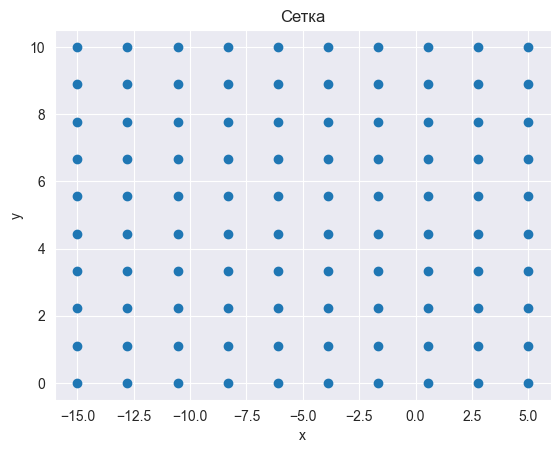

In [29]:
plt.scatter(x_grid, y_grid)
plt.title("Сетка")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

### 2. Запрограммируйте функцию $z = x^2 + (y - 5)^2 + 4$. Вычислите значения этой функции в точках, построенной сетки.

In [44]:
def f(x, y):
    return x ** 2 + (y - 5) ** 2 + 4 

In [45]:
f_grid = f(x_grid, y_grid)

In [46]:
f_grid

array([[329.        , 325.00040812, 321.08244057, ..., 321.08244057,
        325.00040812, 329.        ],
       [322.9802061 , 318.98061422, 315.06264667, ..., 315.06264667,
        318.98061422, 322.9802061 ],
       [317.04203653, 313.04244465, 309.12447709, ..., 309.12447709,
        313.04244465, 317.04203653],
       ...,
       [125.12284461, 121.12325273, 117.20528517, ..., 117.20528517,
        121.12325273, 125.12284461],
       [127.02061014, 123.02101826, 119.10305071, ..., 119.10305071,
        123.02101826, 127.02061014],
       [129.        , 125.00040812, 121.08244057, ..., 121.08244057,
        125.00040812, 129.        ]])

### 3. Постройте 3D-график функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя построенную сетку. Изобразите на графике и саму сетку.
Указание: Для изображения сетки используйте метод [scatter3D](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html), указав по третьей координате нули.

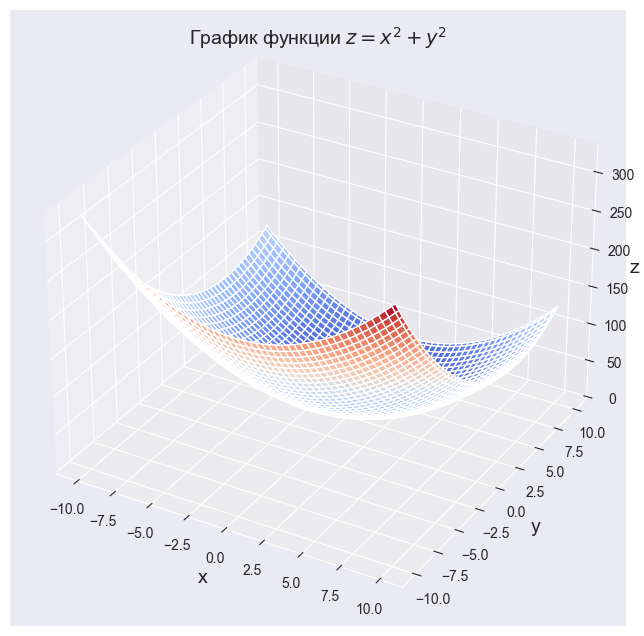

In [47]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, f_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### 4. Постройте 3D-график функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя более мелкую сетку размера $100\times 100$. Саму сетку изображать не нужно. Поменяйте угол обзора графика.
Указание: При помощи ax.view_init(elev=35, azim=20) поменяйте угол обзора графика.

In [59]:
def z(x, y):
    return x**2 + (y-5)**2 + 4

In [60]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

In [61]:
z_grid = z(x_grid, y_grid)

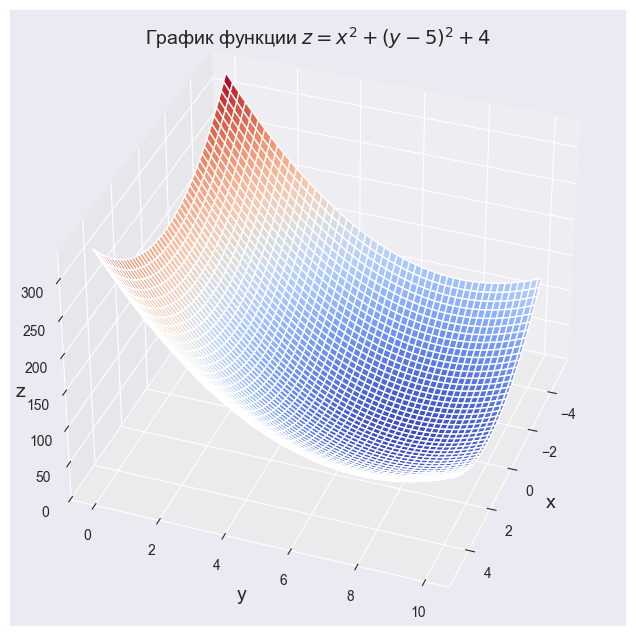

In [62]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, f_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + (y-5)^2 + 4$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

ax.view_init(elev=35, azim=20)

plt.show()

### 5. Постройте 2D-график линий уровня функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.
Указание: Используйте метод [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) библиотеки matplotlib.

In [68]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

z_grid = z(x_grid, y_grid)


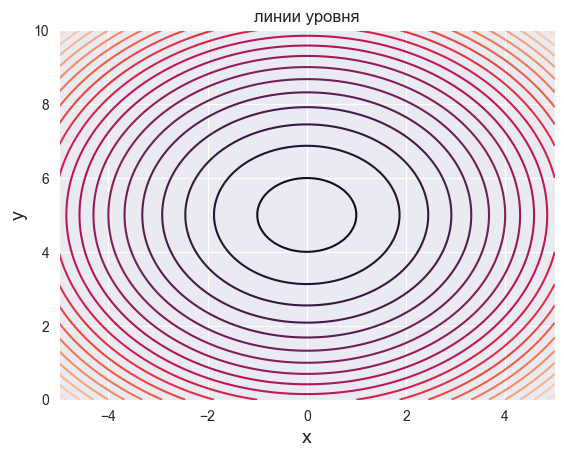

In [70]:
plt.contour(x_grid, y_grid, z_grid, levels= 20)
plt.title('линии уровня')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)

plt.show()

### 6. Постройте 3D-график линий уровня функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.

In [71]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

z_grid = z(x_grid, y_grid)



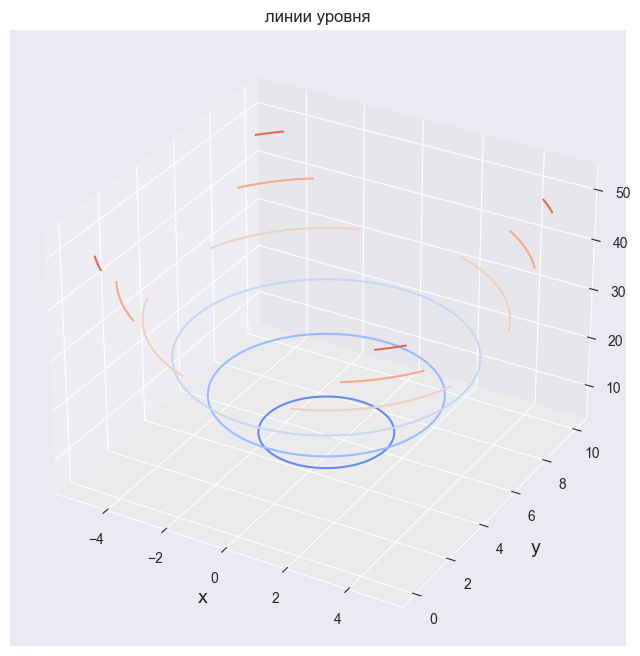

In [74]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.contour(x_grid, y_grid, z_grid, cmap='coolwarm')
plt.title('линии уровня')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

### 7. Постройте на одном 3D-графике функцию $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$ и её линии уровня.
Указание: Для этого при построении поверхности укажите параметр прозрачности alpha=0.5.

In [ ]:
N = 100
x = np.linspace(-5,5,N)
y = np.linspace(0,10,N)
x_grid, y_grid = np.meshgrid(x, y)

z_grid = z(x_grid, y_grid)


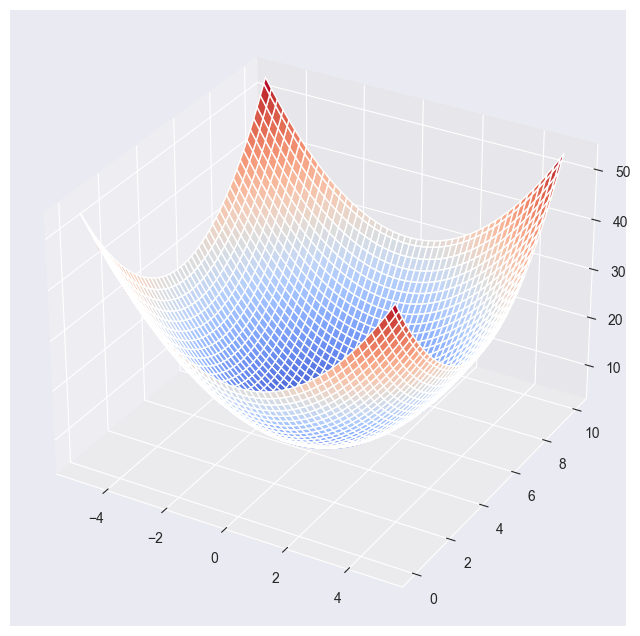

In [77]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm', alpha=1)

ax.contour(x_grid, y_grid, z_grid, cmap='coolwarm')

plt.show()

### 8. Запрограммируйте функцию $f(w) =(w - 3 ) ^ 2$ и её производную. Вычислите значение функции и её производной в случайной точке.

In [84]:
def f(w):
    return (w - 3) ** 2

def df(dw):
    return 2 * (dw - 3)

In [87]:
f(np.random.uniform(-10, 10))


17.55196477637463

In [88]:
df(np.random.uniform(-10, 10))


-17.078666032039536

### 9. Методом градиентного спуска найдите точку минимума функции одной переменной $f(w) =(w - 3 ) ^ 2$.
Указание: Для этого напишите функцию GD_1d, принимающую на вход производную функции одной переменной, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Пусть эта функция возвращает не только саму точку минимума, а numpy-массив значений x на каждом шаге градиентного спуска.

### 10. Визуализируйте процесс нахождения точки минимума функции $f(w) =(w - 3 ) ^ 2$ c learning_rate=0.1 и с learning_rate=0.9.
Указание: Для этого напишите функцию plot_GD_1d, принимающую на вход функцию одной переменной и шаги градиентного спуска, которая строит график этой функции и отмечает на нём точками шаги градиентного спуска, соединённые между собой пунктирной линией.

### 11. Запрограммируйте функцию $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, а также её градиент. Вычислите значение и градиент этой функции в случайной точке.

### 12. Реализуйте метод градиентного спуска и найдите точку минимума функции двух переменных $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$.
Указание: Для этого модифицируйте функцию GD_1d в функцию GD_2d, принимающую на вход градиент, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Обратите внимание, что стартовая точка теперь состоит из двух значений.

### 13. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.2.
Указание: Для этого напишите функцию plot_GD_2d, которая принимает на вход функцию двух переменных и шаги градиентного спуска, а строит график этой функции с линиями уровня и отмечает на нём точки шагов градиентного спуска, соединённые между собой ломаной линией. Для наглядности в функции plot_GD_2d разверните пространственный график на угол с azim=0.

### 14. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.8.

### 15. Методом градиентного спуска найдите минимум функции четырёх переменных  $F(w_1,w_2,w_3,w_4) ={w_1}^2 + ({w_2}+5*w_3)^2 + (2*w_4 - 3)^2 + 6$.
Указание: Для этого модифицируйте функцию GD_2d в функцию GD_nd применимую для функций n-переменных. Выводить нужно только точку минимума функции, а значения на каждом шаге - нет, т.к. визуализация в данном случае невозможна. Подберите необходимые значения learning_rate = 0.001 и max_iter=10000.

### 16. Найдите минимум функции c параметрами a и b $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. методом градиентного спуска. В качестве значений параметров возьмите $a=5, b =-7$ и $a=-2, b =3$.

Указание: Добавьте в функцию GD_nd параметры a и b, назовите, полученную функцию GD.

### 17. Создайте класс GradientDiscent, реализующий метод градиентного спуска для функции $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. Найдите минимумы при различных a и b.
Указание: Укажите в конструкторе класса атрибуты: w и количество итераций. Добавьте в класс методы gradient_F и GD. Создайте метод fit, который вызывает функцию GD.

### 18. Модифицируйте класс GradientDiscent в класс GradientDiscent_err, таким образом, чтобы алгоритм градиентного спуcка останавливался, когда искомое значение точки минимума перестаёт существенно меняться. Добавьте в класс атрибут, выводящий количество сделанных шагов.
Указание: Для этого в метод GD добавьте вычисление средней абсолютной ошибки изменения значений между предыдущим и последующим шагом. Если ошибка станет меньше некоторой заранее заданной очень маленькой величины (error_reduction=0.0000001) - выходите из цикла. 